objectifs :
- tag cloud sur les descriptions selon les variétés
- classification sur les variétés à l'aide des descriptions (et autres variables)
- clustering sur le prix par exemple

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
np.set_printoptions(threshold=10000, suppress=True)
warnings.filterwarnings('ignore')
np.random.seed(1)
import scipy.stats
from sklearn.feature_extraction.text import TfidfVectorizer 

In [2]:
# pré-traitement
!jupyter nbconvert --to script pre_traitement.ipynb
exec(open("pre_traitement.py").read())

[NbConvertApp] Converting notebook pre_traitement.ipynb to script
[NbConvertApp] Writing 1096 bytes to pre_traitement.py


nb avant: 280900
nb_apres: 169786


In [3]:
data=wine.iloc[:,:].values

# Nuages de mots

In [4]:
from collections import Counter

In [5]:
# on recupere les 10 varietes les plus presentes dans le jeu de donnees
counter = Counter(wine['variety'].tolist())
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
counter.most_common(10)

[('Pinot Noir', 16693),
 ('Chardonnay', 15649),
 ('Cabernet Sauvignon', 13307),
 ('Red Blend', 11234),
 ('Bordeaux-style Red Blend', 9030),
 ('Sauvignon Blanc', 6820),
 ('Riesling', 6620),
 ('Syrah', 5869),
 ('Merlot', 4761),
 ('Rosé', 3921)]

In [6]:
data = wine[wine['variety'].map(lambda x: x in top_10_varieties)]

(-0.5, 399.5, 199.5, -0.5)

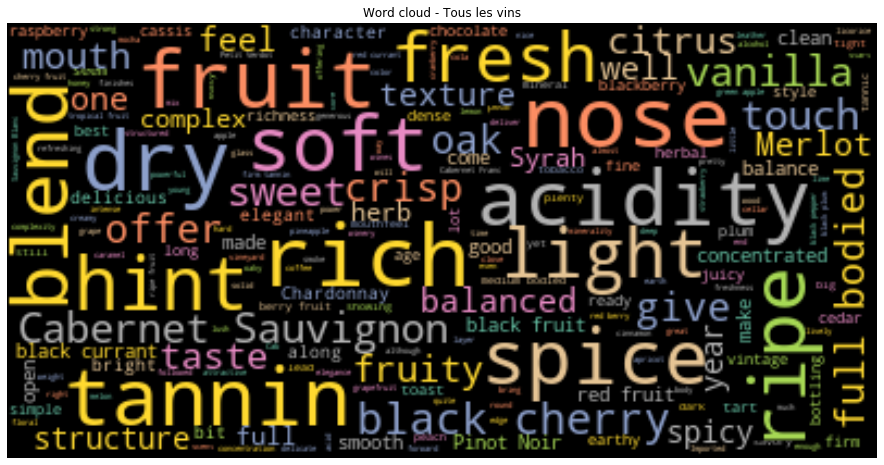

In [7]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS) #on reutilise les stopwords anglais par defaut
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "finish","aroma","aromas","palate","shows","show","note","notes"]) #on rajoute les mots non discriminants dans les stopwords
plt.figure(figsize=(16,8))
plt.title('Word cloud - Tous les vins')
wc = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set2') #algo wordcloud avec 200 mots max
wc.generate(' '.join(data['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

In [8]:
wc.to_file("wordcloud/wc_all.png") #sauvegarder l'image du nuage de mots

In [9]:
wc.words_

{'rich': 1.0,
 'nose': 0.9950738916256158,
 'dry': 0.8802012367676344,
 'fruit': 0.814799287286448,
 'tannin': 0.8070432868672047,
 'acidity': 0.782203123362331,
 'spice': 0.7291688502253433,
 'ripe': 0.7271774447122943,
 'soft': 0.727072633895818,
 'blend': 0.7260245257310555,
 'hint': 0.6897599832302693,
 'light': 0.5959543024840164,
 'fresh': 0.5689131118331412,
 'black cherry': 0.5665024630541872,
 'Cabernet Sauvignon': 0.5649303008070433,
 'vanilla': 0.5641966250917094,
 'sweet': 0.5461691646577926,
 'touch': 0.5288753799392097,
 'offer': 0.5005764594906195,
 'give': 0.491562729273661,
 'full bodied': 0.47384970128917303,
 'crisp': 0.47175348495964786,
 'oak': 0.46515040352164344,
 'citrus': 0.4626349439262132,
 'fruity': 0.45341159207630227,
 'mouth': 0.43926213185200713,
 'taste': 0.4249030499947595,
 'texture': 0.4145267791636097,
 'balanced': 0.41169688711875063,
 'well': 0.40960067078922546,
 'Merlot': 0.40593229221255633,
 'one': 0.4010061838381721,
 'feel': 0.39754742689445

In [10]:
counter.most_common(10)

[('Pinot Noir', 16693),
 ('Chardonnay', 15649),
 ('Cabernet Sauvignon', 13307),
 ('Red Blend', 11234),
 ('Bordeaux-style Red Blend', 9030),
 ('Sauvignon Blanc', 6820),
 ('Riesling', 6620),
 ('Syrah', 5869),
 ('Merlot', 4761),
 ('Rosé', 3921)]

In [11]:
#on recupere pour chaque variete, une seule chaine de caractere qui contient toutes les descriptions
Pinot_Noir = " ".join(review for review in data[data["variety"]=="Pinot Noir"].description)
Chardonnay = " ".join(review for review in data[data["variety"]=="Chardonnay"].description)
Cabernet_Sauvignon = " ".join(review for review in data[data["variety"]=="Cabernet Sauvignon"].description)
Red_Blend = " ".join(review for review in data[data["variety"]=="Red Blend"].description)
BS_Red_Blend = " ".join(review for review in data[data["variety"]=="Bordeaux-style Red Blend"].description)
Sauvignon_Blanc = " ".join(review for review in data[data["variety"]=="Sauvignon Blanc"].description)
Syrah = " ".join(review for review in data[data["variety"]=="Syrah"].description)
Riesling = " ".join(review for review in data[data["variety"]=="Riesling"].description)
Merlot = " ".join(review for review in data[data["variety"]=="Merlot"].description)
Rosé = " ".join(review for review in data[data["variety"]=="Rosé"].description)

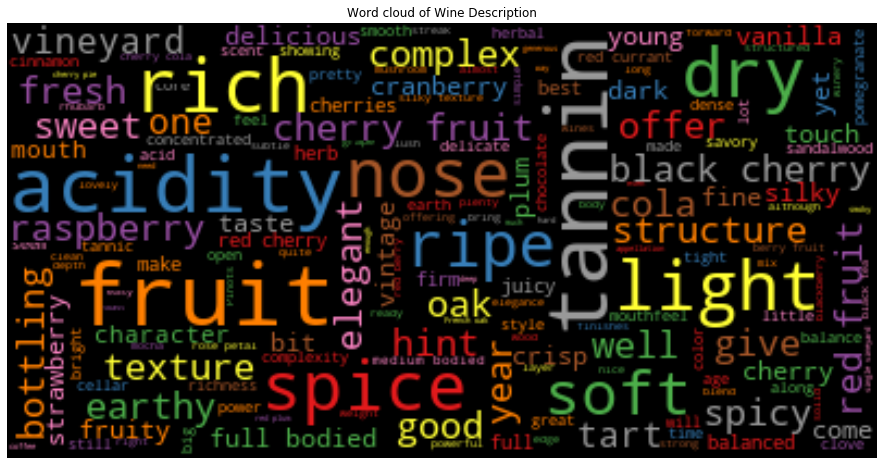

In [12]:
# Pinot Noir
stopwords.update(["Pinot Noir","Pinot","Noir"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Pinot_Noir = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Pinot_Noir.generate(Pinot_Noir)
plt.imshow(wc_Pinot_Noir,interpolation="bilinear")
plt.axis('off')
wc_Pinot_Noir.to_file("wordcloud/wc_Pinot_Noir.png")

In [13]:
wc_Pinot_Noir.words_

{'fruit': 1.0,
 'tannin': 0.9393830703012912,
 'acidity': 0.8116929698708751,
 'rich': 0.716284074605452,
 'dry': 0.6438307030129125,
 'light': 0.6434720229555236,
 'spice': 0.6219512195121951,
 'nose': 0.6154949784791965,
 'ripe': 0.524390243902439,
 'soft': 0.5014347202295553,
 'black cherry': 0.49067431850789095,
 'raspberry': 0.4720229555236729,
 'cola': 0.4612625538020086,
 'hint': 0.4368723098995696,
 'cherry fruit': 0.4350789096126255,
 'fresh': 0.4257532281205165,
 'year': 0.4185796269727403,
 'oak': 0.4139167862266858,
 'texture': 0.40746054519368724,
 'complex': 0.40566714490674316,
 'offer': 0.38952654232424677,
 'red fruit': 0.38952654232424677,
 'earthy': 0.38450502152080346,
 'sweet': 0.38055954088952654,
 'spicy': 0.3733859397417504,
 'well': 0.36908177905308465,
 'give': 0.3662123385939742,
 'good': 0.3615494978479197,
 'elegant': 0.34433285509325684,
 'bottling': 0.3428981348637016,
 'structure': 0.3400286944045911,
 'vineyard': 0.33393113342898134,
 'one': 0.331779053

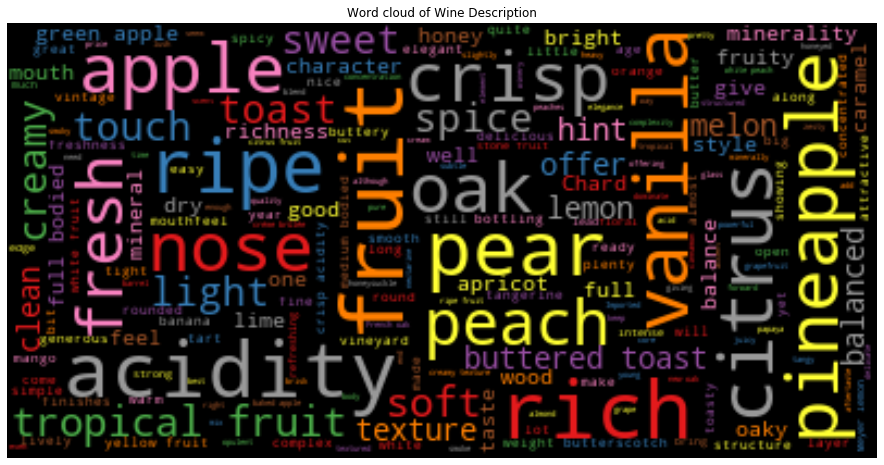

In [14]:
# Chardonnay
words=["Pinot Noir","Pinot","Noir"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["Chardonnay"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Chardonnay = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Chardonnay.generate(Chardonnay)
plt.imshow(wc_Chardonnay,interpolation="bilinear")
plt.axis('off')
wc_Chardonnay.to_file("wordcloud/wc_Chardonnay.png")

In [15]:
wc_Chardonnay.words_

{'fruit': 1.0,
 'rich': 0.8372949447606294,
 'acidity': 0.7984599933043187,
 'pear': 0.7368597254770672,
 'citrus': 0.6829594911282223,
 'ripe': 0.6665550719785738,
 'vanilla': 0.6655507197857382,
 'pineapple': 0.6330766655507197,
 'apple': 0.6039504519584867,
 'nose': 0.5995982591228658,
 'oak': 0.5959156344158018,
 'crisp': 0.5728155339805825,
 'fresh': 0.4931369266822899,
 'peach': 0.4911282222966187,
 'tropical fruit': 0.46534984934717105,
 'soft': 0.44928021426180115,
 'spice': 0.4147974556411115,
 'sweet': 0.4024104452628055,
 'light': 0.3923669233344493,
 'creamy': 0.3776364245061935,
 'toast': 0.3759625041848008,
 'touch': 0.37127552728490126,
 'buttered toast': 0.360562437227988,
 'texture': 0.3602276531637094,
 'offer': 0.3542015400066957,
 'lemon': 0.352527619685303,
 'melon': 0.34549715433545364,
 'hint': 0.3404753933712755,
 'balanced': 0.3337797120857047,
 'clean': 0.3337797120857047,
 'green apple': 0.32674924673585537,
 'dry': 0.32340140609306994,
 'good': 0.32273183796

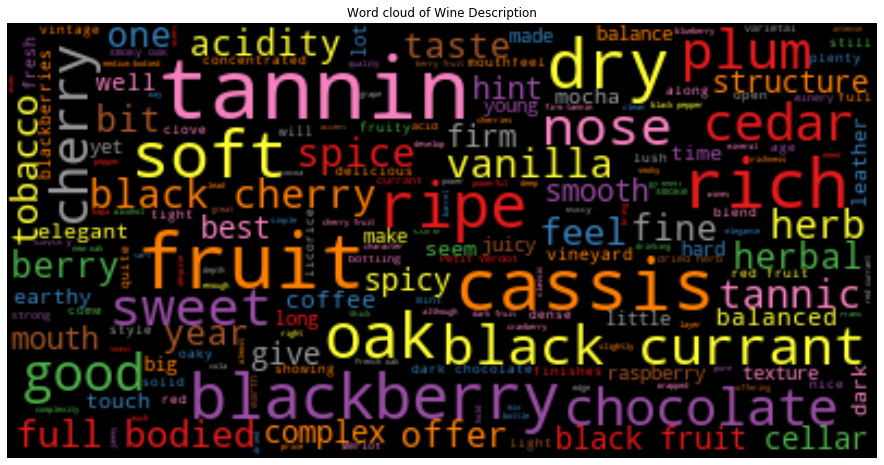

In [16]:
# Cabernet Sauvignon
words=["Pinot Noir","Pinot","Noir"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["Cabernet Sauvignon","Cabernet","Sauvignon","Cab"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Cabernet_Sauvignon = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Cabernet_Sauvignon.generate(Cabernet_Sauvignon)
plt.imshow(wc_Cabernet_Sauvignon,interpolation="bilinear")
plt.axis('off')
wc_Cabernet_Sauvignon.to_file("wordcloud/wc_Cabernet_Sauvignon.png")

In [17]:
wc_Cabernet_Sauvignon.words_

{'tannin': 1.0,
 'fruit': 0.7656572608396421,
 'cassis': 0.6593255333792154,
 'rich': 0.6001376462491397,
 'dry': 0.5567790777701308,
 'soft': 0.5289057123193392,
 'oak': 0.5096352374397798,
 'blackberry': 0.5096352374397798,
 'ripe': 0.5092911218169305,
 'black currant': 0.49965588437715075,
 'sweet': 0.4848589125946318,
 'nose': 0.4755677907777013,
 'plum': 0.465244322092223,
 'good': 0.42601514108740535,
 'chocolate': 0.4222298692360633,
 'cherry': 0.4198210598761184,
 'cedar': 0.4039917412250516,
 'black cherry': 0.3888506538196834,
 'spice': 0.38506538196834134,
 'vanilla': 0.3774948382656573,
 'herb': 0.36373021335168615,
 'tannic': 0.3561596696490021,
 'feel': 0.31348933241569166,
 'tobacco': 0.3021335168616655,
 'full bodied': 0.2976600137646249,
 'acidity': 0.2924982794218858,
 'herbal': 0.2887130075705437,
 'berry': 0.28802477632484513,
 'bit': 0.2756366139022712,
 'year': 0.2718513420509291,
 'taste': 0.27150722642807984,
 'offer': 0.258086717136958,
 'fine': 0.2443220922229

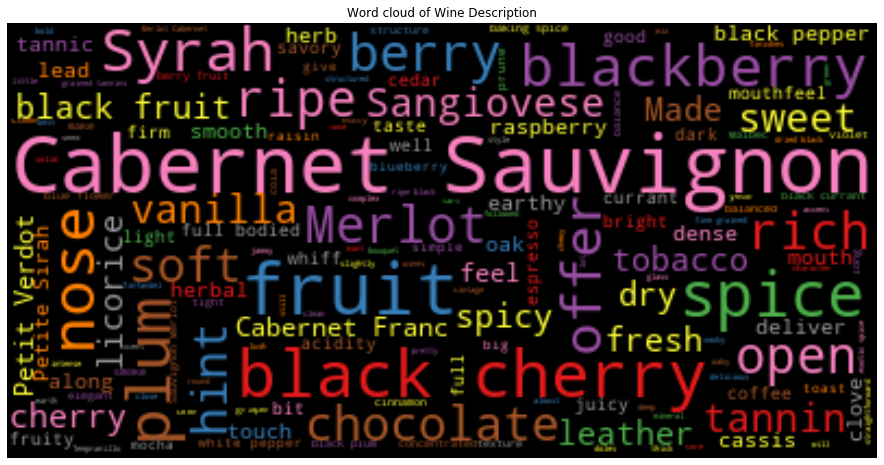

In [18]:
# Red_Blend
words=["Cabernet Sauvignon","Cabernet","Sauvignon","Cab"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["red","blend"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Red_Blend = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Red_Blend.generate(Red_Blend)
plt.imshow(wc_Red_Blend,interpolation="bilinear")
plt.axis('off')
wc_Red_Blend.to_file("wordcloud/wc_Red_Blend.png")

In [19]:
wc_Red_Blend.words_

{'Cabernet Sauvignon': 1.0,
 'fruit': 0.805736137667304,
 'black cherry': 0.6608030592734225,
 'spice': 0.6363288718929254,
 'plum': 0.5755258126195029,
 'nose': 0.5655831739961759,
 'Syrah': 0.5204588910133843,
 'blackberry': 0.5200764818355641,
 'offer': 0.4891013384321224,
 'berry': 0.4653919694072658,
 'Merlot': 0.42944550669216064,
 'rich': 0.42791586998087955,
 'open': 0.42294455066921605,
 'ripe': 0.415678776290631,
 'chocolate': 0.40152963671128106,
 'soft': 0.3881453154875717,
 'hint': 0.38164435946462716,
 'Sangiovese': 0.37896749521988526,
 'tannin': 0.37743785850860423,
 'vanilla': 0.35908221797323137,
 'sweet': 0.35258126195028683,
 'black fruit': 0.3445506692160612,
 'tobacco': 0.3437858508604206,
 'leather': 0.32734225621414914,
 'licorice': 0.3196940726577438,
 'Made': 0.3101338432122371,
 'cherry': 0.30860420650095605,
 'spicy': 0.29751434034416824,
 'fresh': 0.2936902485659656,
 'dry': 0.27762906309751434,
 'Cabernet Franc': 0.2730401529636711,
 'Petit Verdot': 0.2703

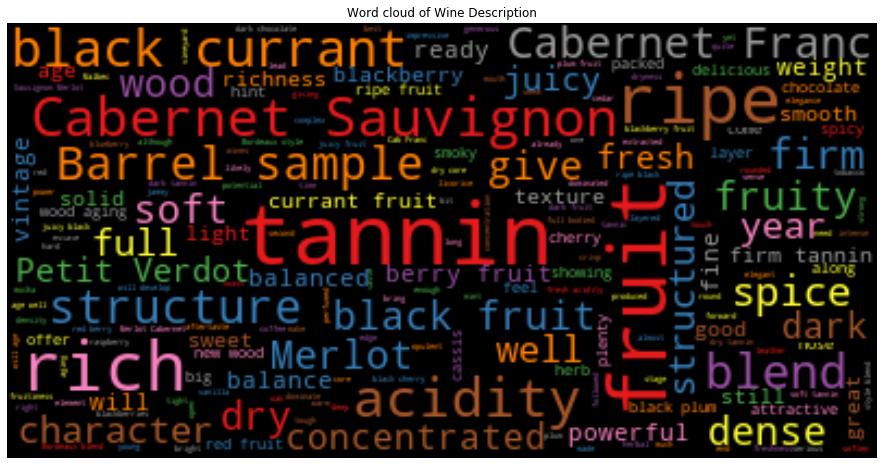

In [20]:
# BS_Red_Blend
words=["red","blend"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
# stopwords.update(["red","blend"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_BS_Red_Blend = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_BS_Red_Blend.generate(BS_Red_Blend)
plt.imshow(wc_BS_Red_Blend,interpolation="bilinear")
plt.axis('off')
wc_BS_Red_Blend.to_file("wordcloud/wc_BS_Red_Blend.png")

In [21]:
wc_BS_Red_Blend.words_

{'tannin': 1.0,
 'fruit': 0.8391583452211127,
 'ripe': 0.6216119828815977,
 'rich': 0.56811697574893,
 'Cabernet Sauvignon': 0.5674037089871612,
 'acidity': 0.5570613409415122,
 'black currant': 0.5181883024251069,
 'blend': 0.4226105563480742,
 'structure': 0.4015691868758916,
 'Barrel sample': 0.38445078459343796,
 'Cabernet Franc': 0.3616262482168331,
 'spice': 0.34236804564907275,
 'firm': 0.3355920114122682,
 'fruity': 0.3174037089871612,
 'black fruit': 0.3145506419400856,
 'give': 0.30920114122681885,
 'dense': 0.30848787446504994,
 'Merlot': 0.2977888730385164,
 'soft': 0.2888730385164051,
 'dry': 0.2813837375178317,
 'wood': 0.2810271041369472,
 'structured': 0.2631954350927247,
 'character': 0.2549928673323823,
 'full': 0.2464336661911555,
 'year': 0.24607703281027105,
 'well': 0.2407275320970043,
 'concentrated': 0.23858773181169757,
 'dark': 0.23609129814550642,
 'Petit Verdot': 0.22574893009985736,
 'fresh': 0.22182596291012838,
 'juicy': 0.21576319543509273,
 'berry fruit

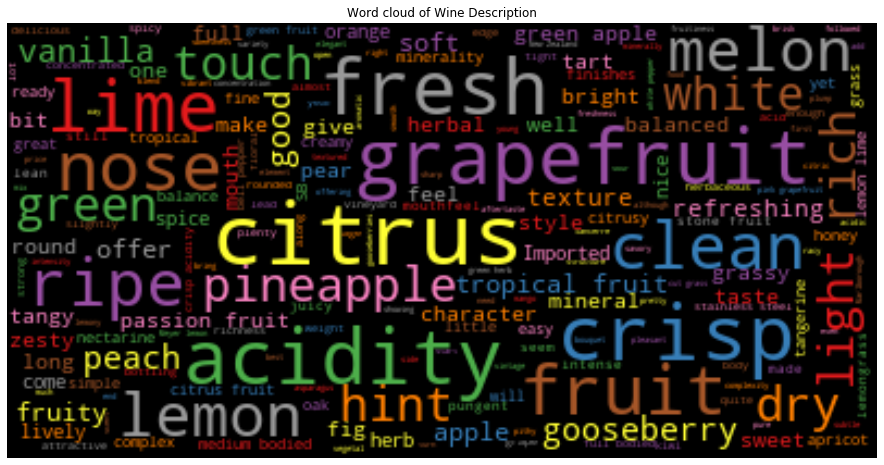

In [22]:
# Sauvignon_Blanc
words=["red","blend"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["Sauvignon Blanc","Sauvignon","Blanc"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Sauvignon_Blanc = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Sauvignon_Blanc.generate(Sauvignon_Blanc)
plt.imshow(wc_Sauvignon_Blanc,interpolation="bilinear")
plt.axis('off')
wc_Sauvignon_Blanc.to_file("wordcloud/wc_Sauvignon_Blanc.png")

In [23]:
wc_Sauvignon_Blanc.words_

{'citrus': 1.0,
 'crisp': 0.8003814367450731,
 'acidity': 0.7387158296249206,
 'fresh': 0.7253655435473617,
 'grapefruit': 0.71900826446281,
 'lime': 0.6274634456452638,
 'fruit': 0.6039415130324222,
 'nose': 0.59631277813096,
 'ripe': 0.5193897012078831,
 'clean': 0.5047679593134139,
 'melon': 0.4322949777495232,
 'lemon': 0.42848061029879214,
 'pineapple': 0.41703750794659883,
 'dry': 0.40114431023521935,
 'light': 0.3941513032422123,
 'rich': 0.39097266369993644,
 'hint': 0.378893833439288,
 'green': 0.37444373808010173,
 'white': 0.3420216147488875,
 'touch': 0.3375715193897012,
 'gooseberry': 0.32231404958677684,
 'good': 0.3172282263191354,
 'peach': 0.3165924984106802,
 'vanilla': 0.3146853146853147,
 'tropical fruit': 0.3083280356007629,
 'soft': 0.29879211697393515,
 'apple': 0.2937062937062937,
 'fruity': 0.2898919262555626,
 'offer': 0.28862047043865224,
 'refreshing': 0.28798474253019707,
 'texture': 0.28417037507946596,
 'passion fruit': 0.28226319135410044,
 'sweet': 0.28

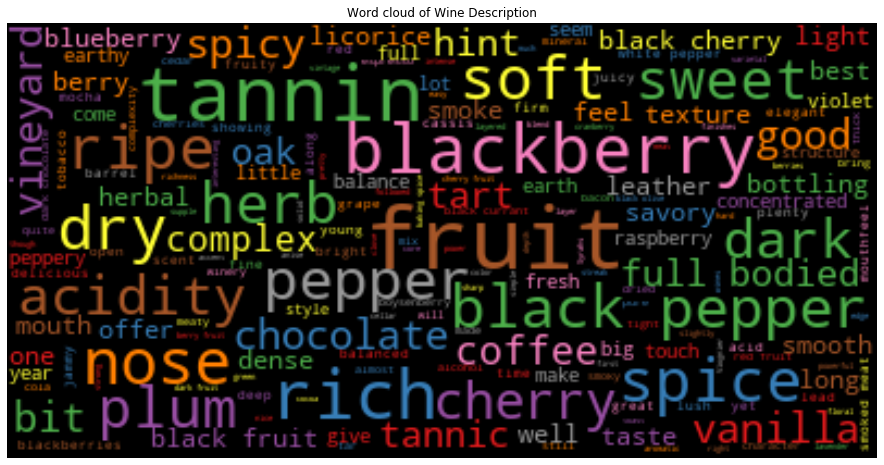

In [24]:
# Syrah
words=["Sauvignon Blanc","Sauvignon","Blanc"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["Syrah"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Syrah = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Syrah.generate(Syrah)
plt.imshow(wc_Syrah,interpolation="bilinear")
plt.axis('off')
wc_Syrah.to_file("wordcloud/wc_Syrah.png")

In [25]:
wc_Syrah.words_

{'fruit': 1.0,
 'tannin': 0.8139705882352941,
 'rich': 0.6433823529411765,
 'blackberry': 0.5852941176470589,
 'nose': 0.5169117647058824,
 'spice': 0.47573529411764703,
 'dry': 0.47058823529411764,
 'soft': 0.4647058823529412,
 'ripe': 0.4536764705882353,
 'pepper': 0.4183823529411765,
 'black pepper': 0.4161764705882353,
 'herb': 0.3977941176470588,
 'sweet': 0.3889705882352941,
 'plum': 0.38529411764705884,
 'dark': 0.34338235294117647,
 'acidity': 0.33897058823529413,
 'cherry': 0.3382352941176471,
 'chocolate': 0.3323529411764706,
 'good': 0.3272058823529412,
 'vanilla': 0.31985294117647056,
 'spicy': 0.3176470588235294,
 'bit': 0.3088235294117647,
 'vineyard': 0.30661764705882355,
 'coffee': 0.3044117647058823,
 'full bodied': 0.30220588235294116,
 'hint': 0.29705882352941176,
 'tart': 0.2926470588235294,
 'oak': 0.29044117647058826,
 'tannic': 0.2852941176470588,
 'complex': 0.28455882352941175,
 'black cherry': 0.2801470588235294,
 'black fruit': 0.27058823529411763,
 'offer': 

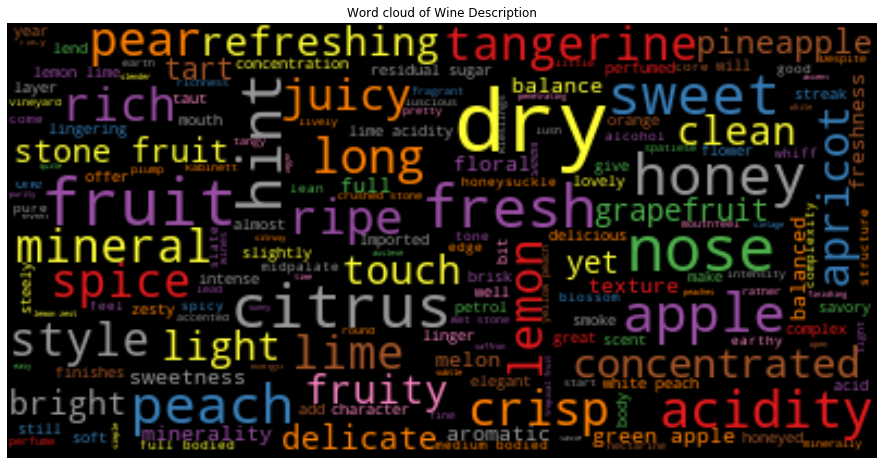

In [26]:
# Riesling
words=["Syrah"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["Riesling"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Riesling = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Riesling.generate(Riesling)
plt.imshow(wc_Riesling,interpolation="bilinear")
plt.axis('off')
wc_Riesling.to_file("wordcloud/wc_Riesling.png")

In [27]:
wc_Riesling.words_

{'dry': 1.0,
 'fruit': 0.5020408163265306,
 'nose': 0.476734693877551,
 'citrus': 0.45346938775510204,
 'fresh': 0.423265306122449,
 'hint': 0.42122448979591837,
 'honey': 0.40530612244897957,
 'sweet': 0.39918367346938777,
 'apple': 0.36979591836734693,
 'peach': 0.36081632653061224,
 'acidity': 0.34408163265306124,
 'crisp': 0.2914285714285714,
 'pear': 0.2816326530612245,
 'long': 0.26979591836734695,
 'ripe': 0.26571428571428574,
 'lemon': 0.25020408163265306,
 'mineral': 0.24653061224489795,
 'lime': 0.24612244897959185,
 'tangerine': 0.24244897959183673,
 'rich': 0.23551020408163265,
 'style': 0.23510204081632652,
 'spice': 0.2289795918367347,
 'juicy': 0.2179591836734694,
 'apricot': 0.21510204081632653,
 'concentrated': 0.20775510204081632,
 'refreshing': 0.1983673469387755,
 'fruity': 0.19551020408163267,
 'clean': 0.19183673469387755,
 'light': 0.1853061224489796,
 'touch': 0.18285714285714286,
 'stone fruit': 0.17877551020408164,
 'delicate': 0.17795918367346938,
 'pineapple

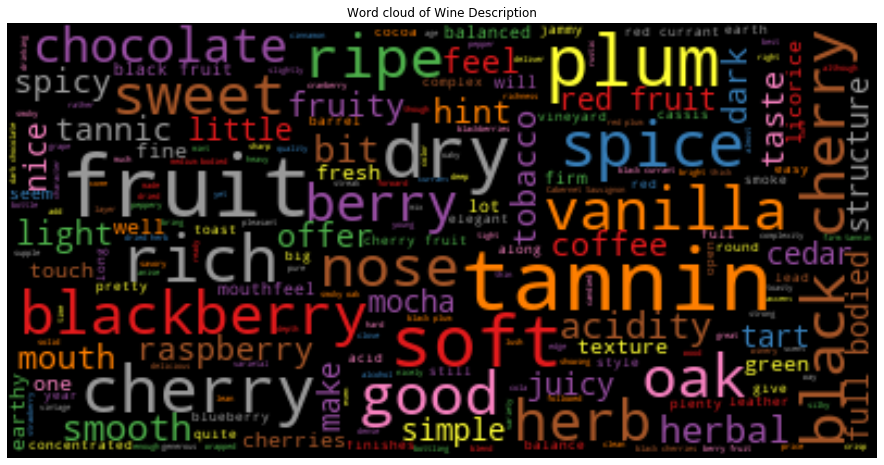

In [28]:
# Merlot
words=["Riesling"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["Merlot"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Merlot = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Merlot.generate(Merlot)
plt.imshow(wc_Merlot,interpolation="bilinear")
plt.axis('off')
wc_Merlot.to_file("wordcloud/wc_Merlot.png")

In [29]:
wc_Merlot.words_

{'tannin': 1.0,
 'fruit': 0.956140350877193,
 'dry': 0.6736842105263158,
 'plum': 0.6596491228070176,
 'soft': 0.6578947368421053,
 'cherry': 0.5561403508771929,
 'rich': 0.5517543859649123,
 'spice': 0.5219298245614035,
 'oak': 0.45964912280701753,
 'ripe': 0.45263157894736844,
 'black cherry': 0.43859649122807015,
 'sweet': 0.4280701754385965,
 'nose': 0.41842105263157897,
 'blackberry': 0.40964912280701754,
 'vanilla': 0.40350877192982454,
 'good': 0.4017543859649123,
 'herb': 0.37894736842105264,
 'berry': 0.3780701754385965,
 'chocolate': 0.34385964912280703,
 'acidity': 0.32456140350877194,
 'herbal': 0.3236842105263158,
 'bit': 0.30526315789473685,
 'smooth': 0.30350877192982456,
 'raspberry': 0.2894736842105263,
 'dark': 0.2833333333333333,
 'light': 0.28157894736842104,
 'hint': 0.2754385964912281,
 'tannic': 0.2710526315789474,
 'feel': 0.25526315789473686,
 'offer': 0.2535087719298246,
 'coffee': 0.25087719298245614,
 'mouth': 0.24561403508771928,
 'spicy': 0.242105263157894

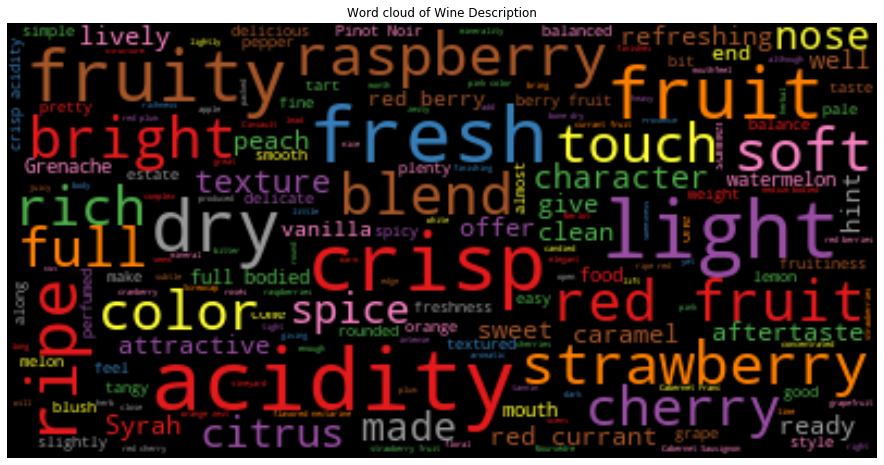

In [30]:
# Rosé
words=["Merlot"]
for i in words:
    if i in stopwords:
        stopwords.remove(i)
stopwords.update(["Rosé"])
plt.figure(figsize=(16,8))
plt.title('Word cloud of Wine Description')
wc_Rosé = WordCloud(max_words=200,max_font_size=40,background_color='black', stopwords = stopwords,colormap='Set1')
wc_Rosé.generate(Rosé)
plt.imshow(wc_Rosé,interpolation="bilinear")
plt.axis('off')
wc_Rosé.to_file("wordcloud/wc_Rosé.png")

In [31]:
wc_Rosé.words_

{'acidity': 1.0,
 'crisp': 0.8260437375745527,
 'light': 0.8230616302186878,
 'fresh': 0.7862823061630219,
 'fruit': 0.6709741550695825,
 'dry': 0.6590457256461233,
 'fruity': 0.6461232604373758,
 'ripe': 0.5735586481113321,
 'strawberry': 0.5347912524850894,
 'soft': 0.5268389662027833,
 'raspberry': 0.5139165009940357,
 'bright': 0.49304174950298213,
 'blend': 0.4840954274353877,
 'red fruit': 0.4801192842942346,
 'color': 0.43737574552683894,
 'cherry': 0.43141153081510936,
 'touch': 0.4284294234592445,
 'rich': 0.42047713717693835,
 'full': 0.4194831013916501,
 'spice': 0.3976143141153082,
 'citrus': 0.3926441351888668,
 'nose': 0.3628230616302187,
 'made': 0.36182902584493043,
 'character': 0.341948310139165,
 'texture': 0.3399602385685885,
 'refreshing': 0.32007952286282304,
 'red currant': 0.3101391650099404,
 'offer': 0.2992047713717694,
 'well': 0.2952286282306163,
 'give': 0.2952286282306163,
 'hint': 0.29025844930417494,
 'Syrah': 0.279324055666004,
 'aftertaste': 0.27833001

# Similarités des nuages de mots.

In [32]:
#on recupere les mots des word cloud
dictWC=[wc_Pinot_Noir.words_,wc_Chardonnay.words_,wc_Cabernet_Sauvignon.words_,wc_Red_Blend.words_,wc_BS_Red_Blend.words_\
        ,wc_Sauvignon_Blanc.words_,wc_Syrah.words_,wc_Riesling.words_,wc_Merlot.words_,wc_Rosé.words_]

# grace aux poids, on cree une nouvelle chaine de caractere pour chaque variete
WC_ponder=[]
for i in dictWC:
    temp=[]
    for key,value in i.items():
        for j in range(int(1000*value)): #choix arbitraire => il faut avoir assez de mots
            temp.append(key)
    WC_ponder.append(" ".join(temp))

In [33]:
# on applique TF-IDF Vectorizer (normalise automatiquement)
tfidf = TfidfVectorizer(stop_words="english").fit_transform(WC_ponder)
pairwise_similarity = tfidf * tfidf.T #on calcule la matrice des similarites cosinus
similitudes=np.around(pairwise_similarity.toarray(), decimals=2)
print(similitudes)

[[1.   0.4  0.74 0.49 0.54 0.32 0.69 0.3  0.82 0.6 ]
 [0.4  1.   0.35 0.24 0.32 0.72 0.35 0.68 0.38 0.48]
 [0.74 0.35 1.   0.63 0.65 0.27 0.84 0.24 0.91 0.4 ]
 [0.49 0.24 0.63 1.   0.69 0.2  0.62 0.19 0.65 0.36]
 [0.54 0.32 0.65 0.69 1.   0.24 0.59 0.21 0.66 0.43]
 [0.32 0.72 0.27 0.2  0.24 1.   0.31 0.7  0.31 0.49]
 [0.69 0.35 0.84 0.62 0.59 0.31 1.   0.27 0.84 0.41]
 [0.3  0.68 0.24 0.19 0.21 0.7  0.27 1.   0.27 0.43]
 [0.82 0.38 0.91 0.65 0.66 0.31 0.84 0.27 1.   0.51]
 [0.6  0.48 0.4  0.36 0.43 0.49 0.41 0.43 0.51 1.  ]]


In [34]:
vins=[]
for i in counter.most_common(10):
    vins.append(i[0])
print(vins)

['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Sauvignon Blanc', 'Riesling', 'Syrah', 'Merlot', 'Rosé']


In [35]:
from sklearn.cluster import DBSCAN
# clustering sur les similarites cosinus
vect=DBSCAN(min_samples=1)
x=vect.fit_predict(similitudes)
print(x)

[0 1 0 2 2 1 0 1 0 3]


In [36]:
# on identifie quel vin va dans quel cluster
cluster1=[]
cluster2=[]
cluster3=[]
for ind,i in enumerate(x):
    if i==0:
        cluster1.append(vins[ind])
    if i==1:
        cluster2.append(vins[ind])
    if i==2:
        cluster3.append(vins[ind])
print("Cluster 1:",cluster1)
print("Cluster 2:",cluster2)
print("Cluster 3:",cluster3)

Cluster 1: ['Pinot Noir', 'Cabernet Sauvignon', 'Riesling', 'Merlot']
Cluster 2: ['Chardonnay', 'Sauvignon Blanc', 'Syrah']
Cluster 3: ['Red Blend', 'Bordeaux-style Red Blend']


In [37]:
#on print la matrice des similarites cosinus de chaque cluster, ainsi que le min de chaque matrice
for i in range(len(np.unique(x))):
    ind_cluster=np.where(x==i)[0]
    cluster=similitudes[ind_cluster,][:,ind_cluster]
    print("cluster {} : \n {}".format(i,cluster))
    print("min : ",np.min(cluster))
    print()

cluster 0 : 
 [[1.   0.74 0.69 0.82]
 [0.74 1.   0.84 0.91]
 [0.69 0.84 1.   0.84]
 [0.82 0.91 0.84 1.  ]]
min :  0.69

cluster 1 : 
 [[1.   0.72 0.68]
 [0.72 1.   0.7 ]
 [0.68 0.7  1.  ]]
min :  0.68

cluster 2 : 
 [[1.   0.69]
 [0.69 1.  ]]
min :  0.69

cluster 3 : 
 [[1.]]
min :  1.0

